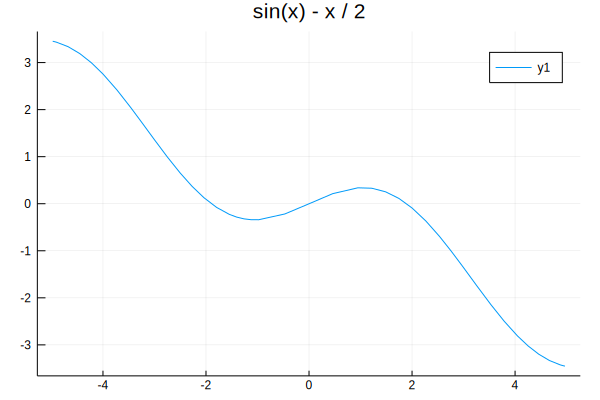

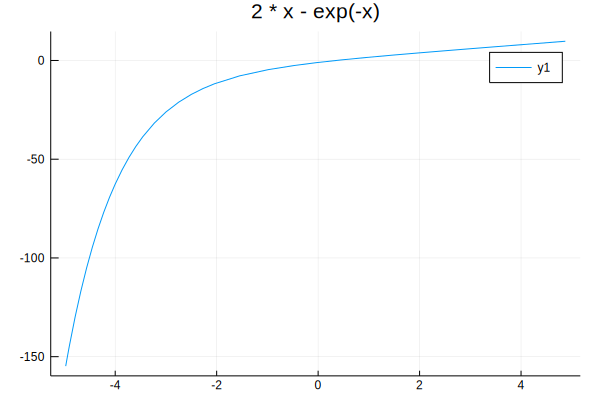

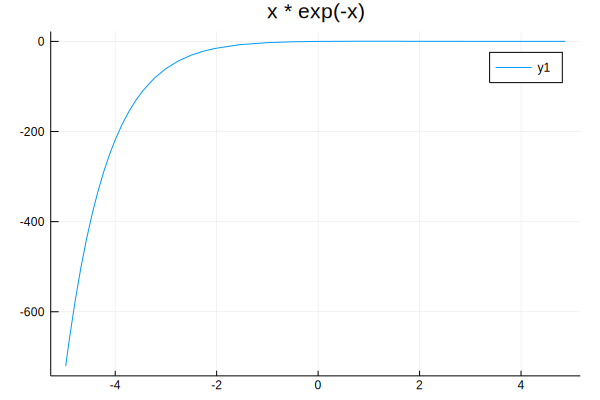

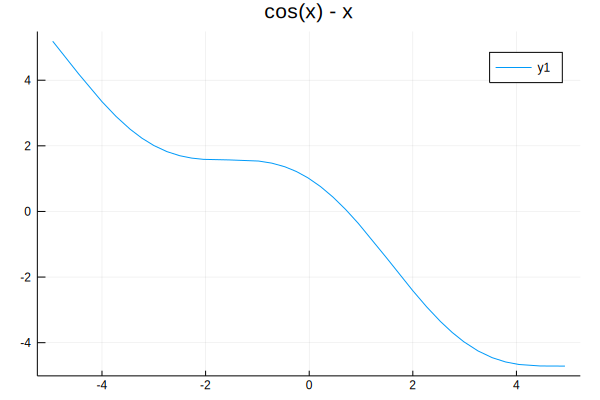

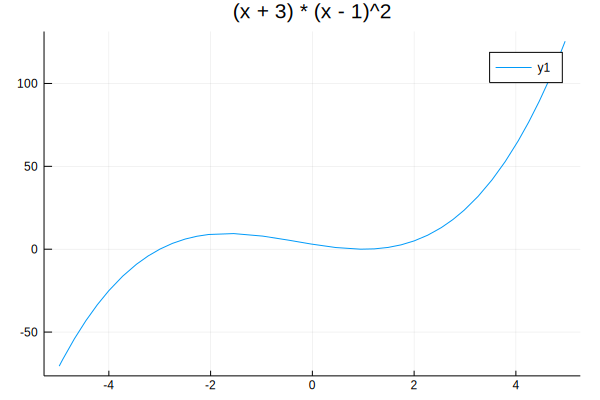

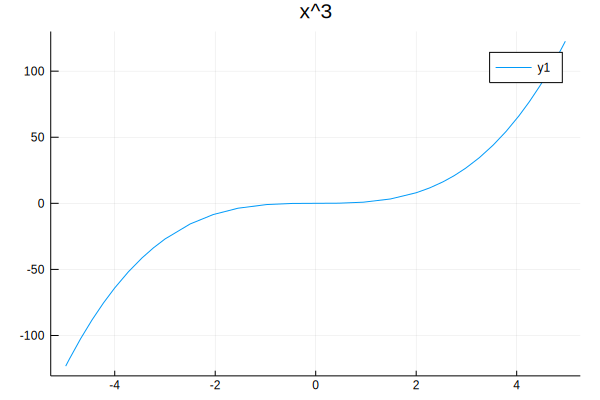

In [83]:
using Roots, ForwardDiff, Plots

D(f) = x -> ForwardDiff.derivative(f, float(x))

function string_to_fun(s)
    f = eval(Meta.parse("x -> " * s))
    return x -> Base.invokelatest(f, x)
end

funs_str = [
    "sin(x) - x / 2",
    "2 * x - exp(-x)",
    "x * exp(-x)",
    "cos(x) - x",
    "(x + 3) * (x - 1)^2",
    "x^3"
]

funs = [string_to_fun(s) for s in funs_str]

wallis_str = "x^3 - 2*x - 5"
wallis = string_to_fun(wallis_str)

hard_bisection_str = "exp(x) - 2 - 1 / (10 * x)^2 + 2 / (100 * x)^3"
hard_bisection = string_to_fun(hard_bisection_str)

hard_newton_str = "x * exp(-x)"
hard_newton = string_to_fun(hard_newton_str)

hard_order2_str = "x^3"
hard_order2 = string_to_fun(hard_order2_str)

a = -5
b = 5

for i in 1:size(funs, 1)
    display(plot(funs[i], a, b, title=funs_str[i]))
end

In [61]:
bisection_val = zeros(size(funs, 1))
bisection_iter = [0, 60, 0, 61, 60, 0]

for i in 1:size(funs, 1)
    println(funs_str[i])
    println()
    x = find_zero(funs[i], (a, b), Bisection(), verbose=true)
    println("   f(", x, ") = ", funs[i](x))
    println("   iszero: ", iszero(funs[i](x)))
    println()
    println("----------------------------------------------")
    println()
    
    bisection[i] = funs[i](x)
end

sin(x) - x / 2

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)

   f(0.0) = 0.0
   iszero: true

----------------------------------------------

2 * x - exp(-x)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  5.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  5.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  5.0000000000000000)
(a_5, b_5) = ( 0.0000000011277734,  5.0000000000000000)
(a_6, b_6) = ( 0.0000751018524170,  5.00000000000

(a_25, b_25) = (-3.0000022351741791, -2.9999411255121231)
(a_26, b_26) = (-3.0000022351741791, -2.9999716803431511)
(a_27, b_27) = (-3.0000022351741791, -2.9999869577586651)
(a_28, b_28) = (-3.0000022351741791, -2.9999945964664221)
(a_29, b_29) = (-3.0000022351741791, -2.9999984158203006)
(a_30, b_30) = (-3.0000003254972398, -2.9999984158203006)
(a_31, b_31) = (-3.0000003254972398, -2.9999993706587702)
(a_32, b_32) = (-3.0000003254972398, -2.9999998480780050)
(a_33, b_33) = (-3.0000000867876224, -2.9999998480780050)
(a_34, b_34) = (-3.0000000867876224, -2.9999999674328137)
(a_35, b_35) = (-3.0000000271102181, -2.9999999674328137)
(a_36, b_36) = (-3.0000000271102181, -2.9999999972715159)
(a_37, b_37) = (-3.0000000121908670, -2.9999999972715159)
(a_38, b_38) = (-3.0000000047311914, -2.9999999972715159)
(a_39, b_39) = (-3.0000000010013537, -2.9999999972715159)
(a_40, b_40) = (-3.0000000010013537, -2.9999999991364348)
(a_41, b_41) = (-3.0000000000688942, -2.9999999991364348)
(a_42, b_42) =

In [56]:
newton_val = zeros(size(funs, 1))
newton_iter = [14, 5, 7, 8, 1, 29]

for i in 1:size(funs, 1)
    println(funs_str[i])
    println()
    x = find_zero((funs[i], D(funs[i])), -1, Roots.Newton(), verbose=true)
    println()
    println("   f(", x, ") = ", funs[i](x))
    println("   iszero: ", iszero(funs[i](x)))
    println()
    println("----------------------------------------------")
    println()
    
    newton_val[i] = funs[i](x)
end

sin(x) - x / 2

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 14
* function evaluations: 29
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -0.3414709848078965
x_1 =  7.4727406398312315,	 fx_1 = -2.8081667094536464
x_2 = -14.4785209828738370,	 fx_2 =  6.2969582454430819
x_3 = -6.9351154080461033,	 fx_3 =  2.8608359044584981
x_4 = -16.6356841214309199,	 fx_4 =  9.1180973695297300
x_5 = -8.3439375493161698,	 fx_5 =  3.2896151695238847
x_6 = -4.9546327243405406,	 fx_6 =  3.4481185485938926
x_7 =  8.3013179977216467,	 fx_7 = -3.2490565022281146
x_8 =  4.8173199338714303,	 fx_8 = -3.4031597638831967
x_9 = -3.7925744878946874,	 fx_9 =  2.5022549802413874
x_10 = -1.8610609427091811,	 fx_10 = -0.0276377031006260
x_11 = -1.8962142114143934,	 fx_11 =  0.0005898962619408
x_12 = -1.8954945666276892,	 fx_12 =  0.0000002453740378
x_13 = -1.8954942670340329,	 fx_13 =  0

In [57]:
order2_val = zeros(size(funs, 1))
order2_iter = [9, 6, 8, 7, 10, 31]

for i in 1:size(funs, 1)
    println(funs_str[i])
    println()
    x = find_zero(funs[i], -1, Order2(), verbose=true)
    println()
    println("   f(", x, ") = ", funs[i](x))
    println("   iszero: ", iszero(funs[i](x)))
    println()
    println("----------------------------------------------")
    println()
    
    order2_val[i] = funs[i](x)
end

sin(x) - x / 2

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Order2()
* iterations: 9
* function evaluations: 13
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -0.3414709848078965
x_1 =  7.4722050588805011,	 fx_1 = -2.8080983271190343
x_2 = -2.1728614839077096,	 fx_2 =  0.2622629616109802
x_3 = -1.3490028306177893,	 fx_3 = -0.3010030706874401
x_4 = -1.7892636846955341,	 fx_4 = -0.0815989285722255
x_5 = -1.9530017693036719,	 fx_5 =  0.0486565506834270
x_6 = -1.8918378899945612,	 fx_6 = -0.0029883173001923
x_7 = -1.8953770040599560,	 fx_7 = -0.0000960345008404
x_8 = -1.8954942684743967,	 fx_8 =  0.0000000011797330
x_9 = -1.8954942670339809,	 fx_9 =  0.0000000000000000


   f(-1.895494267033981) = 0.0
   iszero: true

----------------------------------------------

2 * x - exp(-x)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Order2()
* iterati

In [63]:
using DataFrames

df = DataFrame(
    f = funs_str,
    bisection_val = bisection_val,
    bisection_iter = bisection_iter,
    newton_val = newton_val,
    newton_iter = newton_iter,
    order2_val = order2_val,
    order2_iter = order2_iter
)

,f,bisection_val,bisection_iter,newton_val,newton_iter,order2_val,order2_iter
,String,Float64,Int64,Float64,Int64,Float64,Int64
1,sin(x) - x / 2,0.0,0,0.0,14,0.0,9
2,2 * x - exp(-x),0.0,60,0.0,5,0.0,6
3,x * exp(-x),0.0,0,-8.81e-27,7,0.0,8
4,cos(x) - x,0.0,61,0.0,8,0.0,7
5,(x + 3) * (x - 1)^2,0.0,60,0.0,1,5.57874e-16,10
6,x^3,0.0,0,-4.78697e-16,29,-6.13415e-16,31


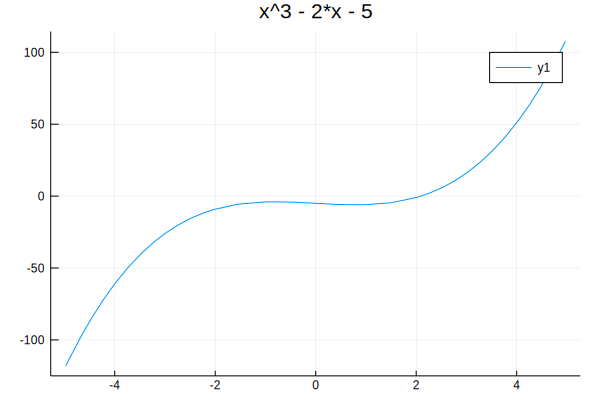

In [76]:
plot(wallis, -5, 5, title=wallis_str)

In [71]:
x = find_zero(wallis, (a, b), Bisection(), verbose=true)
println()
println("   f(", x, ") = ", wallis(x))
println("   iszero: ", iszero(wallis(x)))
println()
println("----------------------------------------------")
println()

Results of univariate zero finding:

* Converged to: 2.094551481542327
* Algorithm: Roots.BisectionExact()
* iterations: 62
* function evaluations: 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  5.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  5.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  5.0000000000000000)
(a_5, b_5) = ( 0.0000000011277734,  5.0000000000000000)
(a_6, b_6) = ( 0.0000751018524170,  5.0000000000000000)
(a_7, b_7) = ( 0.0193786621093750,  5.0000000000000000)
(a_8, b_8) = ( 0.3112792968750000,  5.0000000000000000)
(a_9, b_9) = ( 1.2475585937500000,  5.0000000000000000)
(a_10, b_10) = ( 1.2475585937500000,  2.4975585937500000)
(a_11, b_11) = ( 1.7481689453125000,  2.4975585937500000)
(a_12, b_12) = ( 1.9984741210937500,  2.4975585937500000)
(a_13, b_

In [73]:
x = find_zero((wallis, D(wallis)), -1, Roots.Newton(), verbose=true)
println()
println("   f(", x, ") = ", wallis(x))
println("   iszero: ", iszero(wallis(x)))
println()
println("----------------------------------------------")
println()

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -4.0000000000000000
x_1 =  3.0000000000000000,	 fx_1 =  16.0000000000000000
x_2 =  2.3599999999999999,	 fx_2 =  3.4242559999999997
x_3 =  2.1271967801588163,	 fx_3 =  0.3710998462471959
x_4 =  2.0951360369336340,	 fx_4 =  0.0065266259536862
x_5 =  2.0945516738242675,	 fx_5 =  0.0000021461431423
x_6 =  2.0945514815423474,	 fx_6 =  0.0000000000002327
x_7 =  2.0945514815423265,	 fx_7 = -0.0000000000000009


   f(2.0945514815423265) = -8.881784197001252e-16
   iszero: false

----------------------------------------------



In [78]:
x = find_zero(wallis, -1, Order2(), verbose=true)
println()
println("   f(", x, ") = ", wallis(x))
println("   iszero: ", iszero(wallis(x)))
println()
println("----------------------------------------------")
println()

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Order2()
* iterations: 12
* function evaluations: 16
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -4.0000000000000000
x_1 =  3.0000726669765889,	 fx_1 =  16.0018167219395089
x_2 = -0.2000581302019415,	 fx_2 = -4.6078907172480186
x_3 =  0.5154228167163307,	 fx_3 = -5.8939180574605139
x_4 = -2.7636568271999202,	 fx_4 = -20.5809418584842057
x_5 =  1.8313209174453640,	 fx_5 = -2.5208743922099162
x_6 =  2.4727006770105904,	 fx_6 =  5.1733053927916597
x_7 =  2.0414586912885833,	 fx_7 = -0.5750288884584034
x_8 =  2.0845975533612311,	 fx_8 = -0.1104785469748872
x_9 =  2.0948567618352074,	 fx_9 =  0.0034079526183852
x_10 =  2.0945497641093462,	 fx_10 = -0.0000191690027265
x_11 =  2.0945514815254533,	 fx_11 = -0.0000000001883294
x_12 =  2.0945514815423265,	 fx_12 = -0.0000000000000009


   f(2.0945514815423265) = -8.881784197001252e-16
   iszero

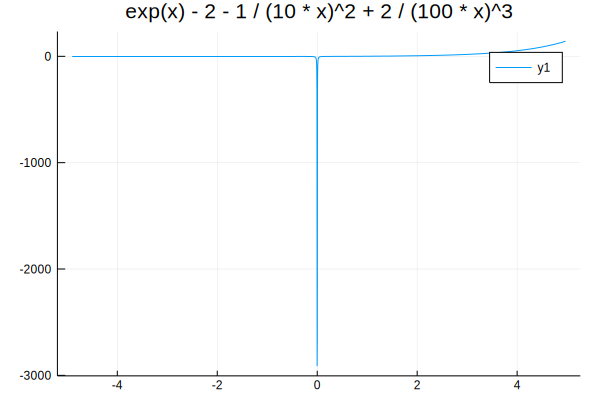

In [85]:
plot(hard_bisection, a, b, title=hard_bisection_str)

In [86]:
x = find_zero(hard_bisection, (a, b), Bisection(), verbose=true)
println()
println("   f(", x, ") = ", hard_bisection(x))
println("   iszero: ", iszero(hard_bisection(x)))
println()
println("----------------------------------------------")
println()

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)


   f(0.0) = NaN
   iszero: false

----------------------------------------------



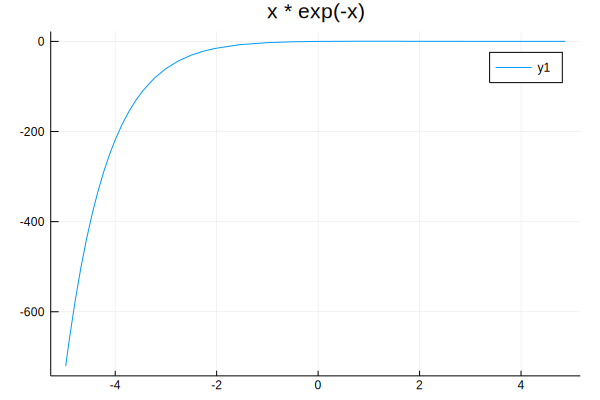

In [88]:
plot(hard_newton, a, b, title=hard_newton_str)

In [90]:
x = find_zero((hard_newton, D(hard_newton)), -1, Roots.Newton(), verbose=true)
println()
println("   f(", x, ") = ", hard_newton(x))
println("   iszero: ", iszero(hard_newton(x)))
println()
println("----------------------------------------------")
println()

Results of univariate zero finding:

* Converged to: -8.80999858950826e-27
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -2.7182818284590451
x_1 = -0.5000000000000000,	 fx_1 = -0.8243606353500641
x_2 = -0.1666666666666667,	 fx_2 = -0.1968934021442744
x_3 = -0.0238095238095238,	 fx_3 = -0.0243832198464995
x_4 = -0.0005537098560354,	 fx_4 = -0.0005540165355380
x_5 = -0.0000003064249342,	 fx_5 = -0.0000003064250281
x_6 = -0.0000000000000939,	 fx_6 = -0.0000000000000939
x_7 = -0.0000000000000000,	 fx_7 = -0.0000000000000000


   f(-8.80999858950826e-27) = -8.80999858950826e-27
   iszero: false

----------------------------------------------



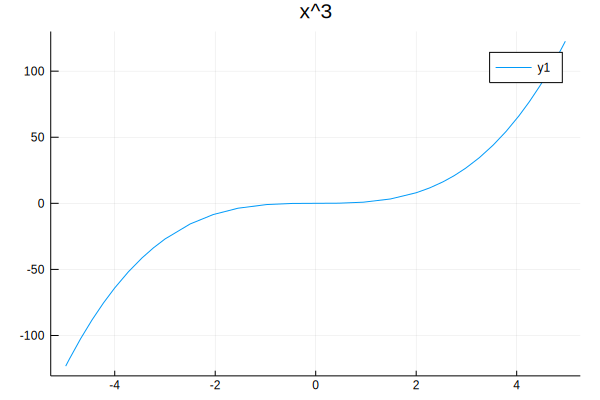

In [92]:
plot(hard_order2, a, b, title=hard_order2_str)

In [93]:
x = find_zero(hard_order2, -1, Order2(), verbose=true)
println()
println("   f(", x, ") = ", hard_order2(x))
println("   iszero: ", iszero(hard_order2(x)))
println()
println("----------------------------------------------")
println()

Results of univariate zero finding:

* Converged to: -8.496725161716299e-6
* Algorithm: Order2()
* iterations: 31
* function evaluations: 56
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 = -0.6666646481619485,	 fx_1 = -0.2962936049648208
x_2 = -0.5263147326927622,	 fx_2 = -0.1457929692901063
x_3 = -0.3903549686417063,	 fx_3 = -0.0594811196591394
x_4 = -0.2966593865295631,	 fx_4 = -0.0261080408112663
x_5 = -0.2233605430884194,	 fx_5 = -0.0111434423527916
x_6 = -0.1687782942777193,	 fx_6 = -0.0048078374984879
x_7 = -0.1273580055099287,	 fx_7 = -0.0020657546904808
x_8 = -0.0961539311642222,	 fx_8 = -0.0008889987165791
x_9 = -0.0638044528882613,	 fx_9 = -0.0002597484514387
x_10 = -0.0424494836431578,	 fx_10 = -0.0000764922147300
x_11 = -0.0282741276994024,	 fx_11 = -0.0000226030812122
x_12 = -0.0188418800888136,	 fx_12 = -0.0000066891772915
x_13 = -0.0125590231389601,	 fx_13 = -0.0000019809229419
x_1